In [17]:
import numpy as np 
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
class LinearRegression:
    def __init__(self):
        self.m=0
        self.b=0
    
    def fit(self,X_train,y_train):
        n=0
        d=0
        
        for i in range(X_train.shape[0]):
            n=n+((X_train[i]-X_train.mean()))*(y_train[i]-y_train.mean())
            d=d+((X_train[i]-X_train.mean()))*(X_train[i]-X_train.mean())
        self.m=n/d
        self.b=y_train.mean()-(self.m*X_train.mean())
        
    def predict(self,X_test):
        return (self.m * X_test) + (self.b)

In [3]:
class RidgeRegression:
    def __init__(self):
        self.m=0
        self.b=0
    
    def fit(self,X_train,y_train,lambd):
        n=0
        d=0
        
        for i in range(X_train.shape[0]):
            n=n+((X_train[i]-X_train.mean()))*(y_train[i]-y_train.mean())
            d=d+((X_train[i]-X_train.mean()))*(X_train[i]-X_train.mean())
        self.m=n/(d-lambd)
        self.b=y_train.mean()-(self.m*X_train.mean())
        
    def predict(self,X_test):
        return (self.m * X_test) + (self.b)

In [4]:
class LassoRegression:
    def __init__(self):
        self.m=0
        self.b=0
    
    def fit(self,X_train,y_train,lambd):
        n=0
        d=0
        
        for i in range(X_train.shape[0]):
            n=n+((X_train[i]-X_train.mean()))*(y_train[i]-y_train.mean())
            d=d+((X_train[i]-X_train.mean()))*(X_train[i]-X_train.mean())
        self.m=(n-lambd)/(d)
        self.b=y_train.mean()-(self.m*X_train.mean())
        
    def predict(self,X_test):
        return (self.m * X_test) + (self.b)

In [5]:
class ElasticNetRegression:
    def __init__(self):
        self.m=0
        self.b=0
    
    def fit(self,X_train,y_train,lambd1,lambd2):
        n=0
        d=0
        
        for i in range(X_train.shape[0]):
            n=n+((X_train[i]-X_train.mean()))*(y_train[i]-y_train.mean())
            d=d+((X_train[i]-X_train.mean()))*(X_train[i]-X_train.mean())
        self.m=(n-lambd1)/(d-lambd2)
        self.b=y_train.mean()-(self.m*X_train.mean())
        
    def predict(self,X_test):
        return (self.m * X_test) + (self.b)

In [6]:
df=pd.read_csv("placement.csv")

In [7]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [8]:
lr=LinearRegression()
rr=RidgeRegression()
lar=LassoRegression()
enr=ElasticNetRegression()

In [9]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape

(160,)

In [11]:
lr.fit(X_train,y_train)
rr.fit(X_train,y_train,1.24)
lar.fit(X_train,y_train,2)
enr.fit(X_train,y_train,2.43,1)

In [12]:
print(lr.predict(5.12))

1.9606021816934538


In [13]:
print(rr.predict(5.12))

1.9534205258605608


In [14]:
print(lar.predict(5.12))

1.981220674524355


In [15]:
print(enr.predict(5.12))

1.9800085764714002


In [16]:
print(2.43/3.43*100,"%")

70.8454810495627 %


Text(0, 0.5, 'CTC(lpa)')

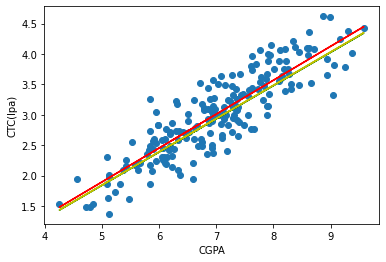

In [28]:
z1=lr.m*X+lr.b
z2=lar.m*X+lr.b
z3=enr.m*X+lr.b
plt.scatter(X,y)
plt.plot(X,z1,color='r')
plt.plot(X,z2,color='g')
plt.plot(X,z3,color='y')
plt.xlabel("CGPA")
plt.ylabel("CTC(lpa)")
